In [58]:
import pandas as pd


In [59]:
import numpy as np

In [60]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

In [62]:
%matplotlib inline

In [63]:
housing= pd.read_csv('Housing.csv')

In [64]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [66]:
status= pd.get_dummies(['furnishingstatus'], drop_first=True)

In [67]:
housing= pd.concat([housing, status], axis=1)

In [68]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [69]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [70]:
def normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))
housing= housing.apply(normalize)

In [71]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


In [72]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [73]:
x=housing[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]
y=housing['price']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, random_state=100)

/home/ritul/anaconda_again/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [77]:
x=housing[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]

In [78]:
y= housing['price']

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
from sklearn.feature_selection import RFE

In [81]:
lr=LinearRegression()


In [83]:
rfe = RFE(lr, 9)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True False  True False  True  True  True False]
[1 1 1 1 1 4 1 3 1 1 1 2]


In [86]:
col=x_train.columns[rfe.support_]

In [87]:
x_train_rfe=x_train[col]


In [88]:
import statsmodels.api as sm

In [89]:
x_train_rfe=sm.add_constant(x_train_rfe)

In [90]:
lm=sm.OLS(y_train, x_train_rfe).fit()

In [91]:
lm.params

const             -1.162265e-16
price              1.000000e+00
area              -1.942890e-16
bedrooms           2.237793e-16
bathrooms         -2.636780e-16
stories            6.938894e-17
guestroom          1.387779e-17
hotwaterheating   -2.220446e-16
airconditioning    1.196959e-16
parking            0.000000e+00
dtype: float64

In [92]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.900e+31
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:26:29   Log-Likelihood:                 13490.
No. Observations:                 381   AIC:                        -2.696e+04
Df Residuals:                     371   BIC:                        -2.692e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.162e-16    1.7e-17     

In [93]:
x_test_rfe= x_test[col]

In [94]:
x_test_rfe= sm.add_constant(x_test_rfe)

In [95]:
y_pred=lm.predict(x_test_rfe)

Text(0,0.5,'Housing Price')

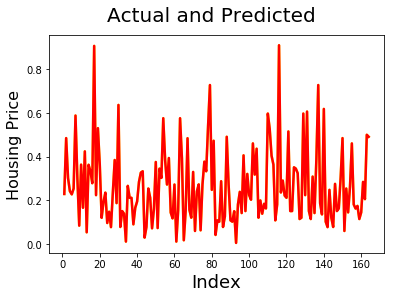

In [99]:
import matplotlib.pyplot as plt
c = [i for i in range(1,165,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="yellow", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

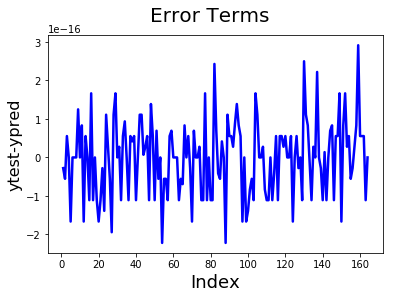

In [97]:
# Error terms
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

/home/ritul/anaconda_again/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Index')

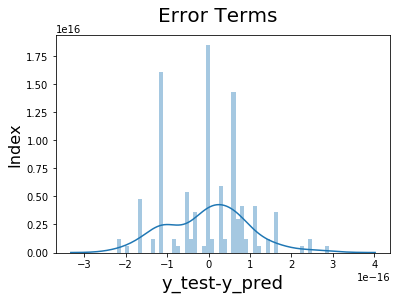

In [100]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label